<a href="https://colab.research.google.com/github/iamprashantjain/Machine_Learning/blob/main/1_Linear_regression_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple Linear Regression

##Intro

1. supervised ml model
2. when output column is numerical
3. there are 3 types of linear regression:

  + simple - works on single input & single output data
  + multiple - when input columns are more then 1
  + polynomial - when data is not linear

##How Linear Regression works?

+ lets say we have we to build a model which predicts the Package amount when user inputs CGPA.

+ simple approach would be to ask every student, take average & predict the average package amount but that wont be true in every case bcoz some students may have got good salary on lower cgpa or there may be other factors.

+ so we'll gather data & plot to see whether data is sort of linear or not

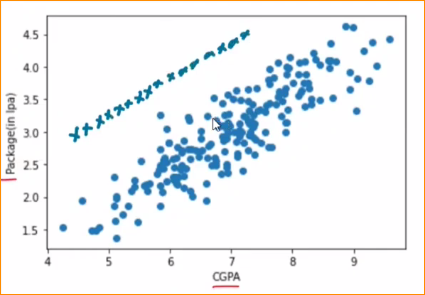

bcoz in real world, data will never be linear, it can be "sort of linear" bcoz it depends on lot of factors

+ if data would have been perfectly linear, we can draw a line which passes through all the data points & put it into formula of line:

  - y = m(x) + b
  - where m is slope (angle between x & y axis) & b is eucleadean distance from y axis

+ but since data is not linear, we can still draw a "Best Fit" line which passes closely through all points meaning it will find that value of m & b which will draw that line which will pass closely through all points

+ Thats what we do in simple regression, we check if data is linear or not. If its sort of linear then we try to draw a best fit line which passes closesly through the data points by finding those values if m & b.



##Code implimentation

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/placement.csv")

In [ ]:
df.head()

cgpa  package
0  6.89     3.26
1  5.12     1.98
2  7.82     3.25
3  7.42     3.67
4  6.94     3.57

Text(0, 0.5, 'package')

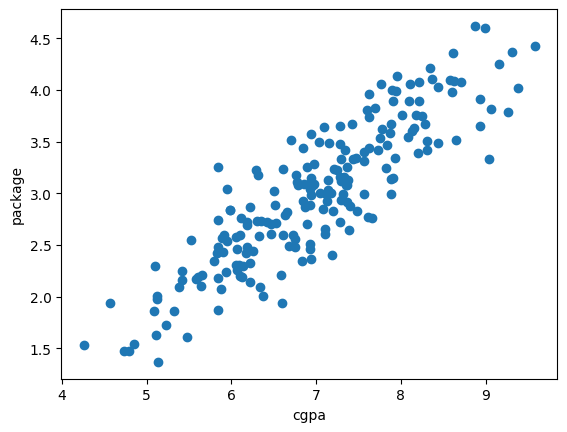

In [ ]:
#plotting a scatter plot to visualize if data is linear or not

plt.scatter(df['cgpa'], df['package'])
plt.xlabel('cgpa')
plt.ylabel('package')

In [ ]:
#since data is linear
#so we'll apply linear regression algorithm

In [ ]:
#seperating X (input) & y (output)

X = df.iloc[:, 0:1]
y = df.iloc[:, -1]

In [ ]:
X

cgpa
0    6.89
1    5.12
2    7.82
3    7.42
4    6.94
..    ...
195  6.93
196  5.89
197  7.21
198  7.63
199  6.22

[200 rows x 1 columns]

In [ ]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [ ]:
#train test split
#to hide some data from model
#which can be used later to training performance

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#test size is 0.2 means 20% data for testing & 80% data for training
#random state to reproduce this result

In [ ]:
#applying algorithm
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
#train model on data
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# creating a dataframe of test data to test algorithm

data = {
    'cgpa': X_test['cgpa'],
    'package': y_test
}

df_test = pd.DataFrame(data)
df_test.sample(5)

cgpa  package
12   8.94     3.65
199  6.22     2.33
45   7.87     3.58
78   6.59     2.21
112  8.58     4.10

In [ ]:
#testing the prediction

# lr.predict(X_test.iloc[1].values.reshape(1, 1))

lr.predict([[7.20]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.12114229])

+ As we can notice that results are not perfect.

Text(0, 0.5, 'package')

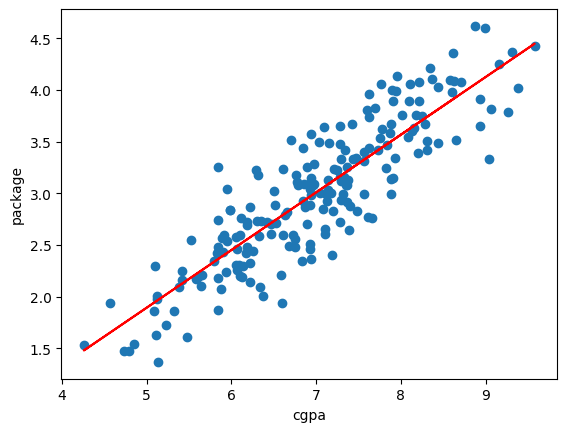

In [ ]:
#lets see the best fit line which was drawn by linear regression

plt.scatter(df['cgpa'], df['package'])
plt.plot(X_train, lr.predict(X_train), color = 'red')
plt.xlabel('cgpa')
plt.ylabel('package')

In [ ]:
#since linear regression drawn a line, it means it must have found the best value of m & b

m = lr.coef_
b = lr.intercept_

print(f"m:{m}, b:{b}")

m:[0.55795197], b:-0.8961119222429144


In [ ]:
#line formula
#y = mx + b

y = (m * 7.20) + b
print(y)

[3.12114229]


In [ ]:
#now even if cgpa value is not in the data
#then also you can get the package value

y = (m * 100) + b
print(y)

[54.89908542]


##Intution

+ y = (m * x) + b
+ package = (m * cgpa) + b

+ m denotes the weightage, how much package depends upon cgpa bcoz thats a slope, if slope will be lower then its change will change package lesser then if slope is higher.

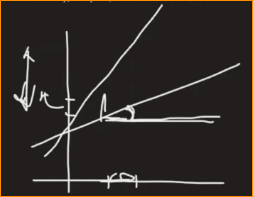

+ b is offset, so when m * cgpa value will become 0, still package will have some value & thats b

##How to find m & b

+ In linear regression, we check if data is linear then we draw a line which passes closely through all data points means with least possible eucladian distannce, once that line is drawn then we can easily find the value of y-axis which is package when we have a new query of x-axis.

+ In order to draw the line we need to find the best fit line, we need the value of m & b, y = mx + b

+ there are 2 way by which we can find the value of m & b
  1. closed form technique (using mathematical formula: OLS)
  2. non closed form (Approximation based technique using probabilities etc: Gradient Descent)

+ when working with lower dimensions we can use OLS & scikit learn linear regression internally uses this technique

+ when working with higher dimension, we use Gradient Descent bcoz deriving the value of m & b will be very difficult. In scikit learn there is a class called SGD Regressor which uses gradient descent techqnique

## OLS Method

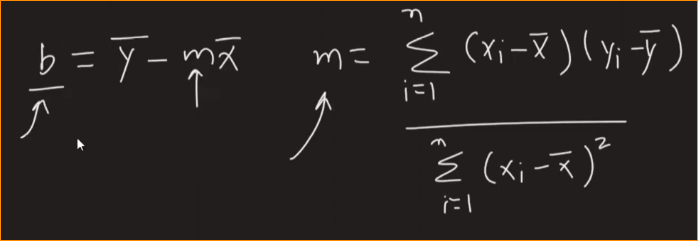


+ xbar & ybar are mean values of x & y
+ xi & yi is current row's cgpa & package
+ so linear regression class of scikit learn uses aove formula to find the best values of m & b

##Maths Intuition
How above formula derived?

+ we'll plot a scatter plot on data we have & its sort of linear
+ We've to draw a best fit line
+ In order to find best fit line, we need to find the value of m & b
+ what is best fit line: A line which goes very closely from every data point, means a line which have minimum distance b/w line & data point

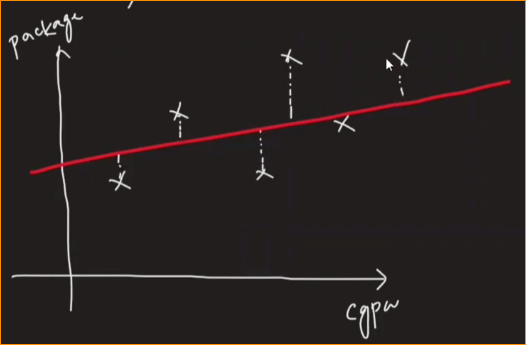

+ If it would have a perfectly linear data then line will go through each data point but since perfectly linear data is not possible so we'll find a "best fit line" which will go closely from each data point means a line which will have least possible distance b/w data & line.

+ to find the total error for each point b/w line & data:

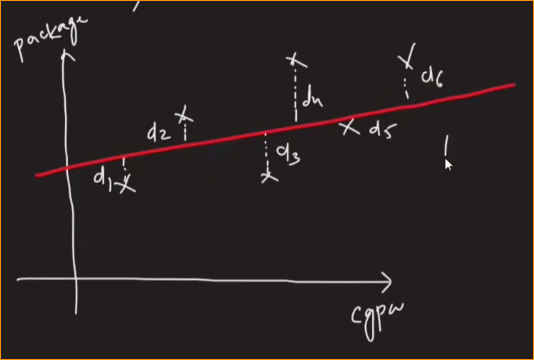

+ E = d1 + d2 + d3 + d4... + dn (where n is total no of points)

+ To avoid -ve values cancelling each other we'll take square of the distance so each distance will be +ve

+ E = d1² + d2² + d3² + .... + dn²

+ but why cant we do mod? bcoz..
  1. we need to penalize outliars
  2. since we need to do diffrentiation & mod graph is continous but not diffrentiable

+ E = d1² + d2² + d3² + .... + dn²
  we can write above as:
  - ∑i=1 to n di²
  - This is error function also called loss function also represented as J

+ now we want a value of m & b which will minize the value of above error function


+ further decomposing abve error function di:

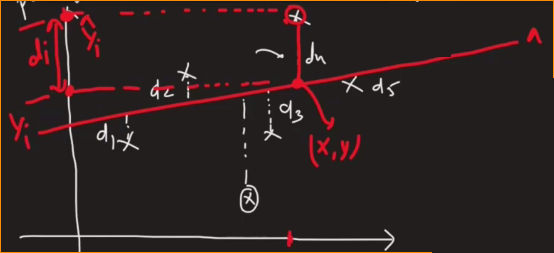

+ since di the distance b/w actual vs predicted meaning yi - yi^ so it can be written as:

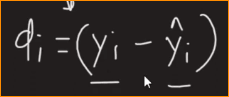


+ so the formula will now become:

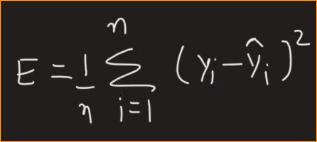

+ 1/n is to find average error, but we'll take total error:

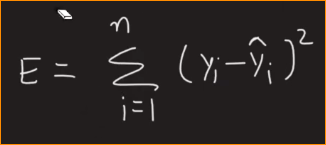


+ so we need to find a line (value of m & b) which will minimize the value of above formula

+ but where is m & b in above equation?

+ how will you find the value of yi^? using line equation:
  yi^ = mxi + b

+ replace in the formula:

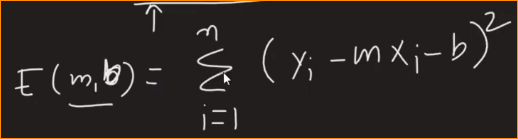

+ In order to switch to another line in a 2d space, what we do? we either move line up or down or change the angle which is nothing but m & b


+ How the value of E will change when changing the value of either m or b alone.

+ changing value of m & keeping b = 0

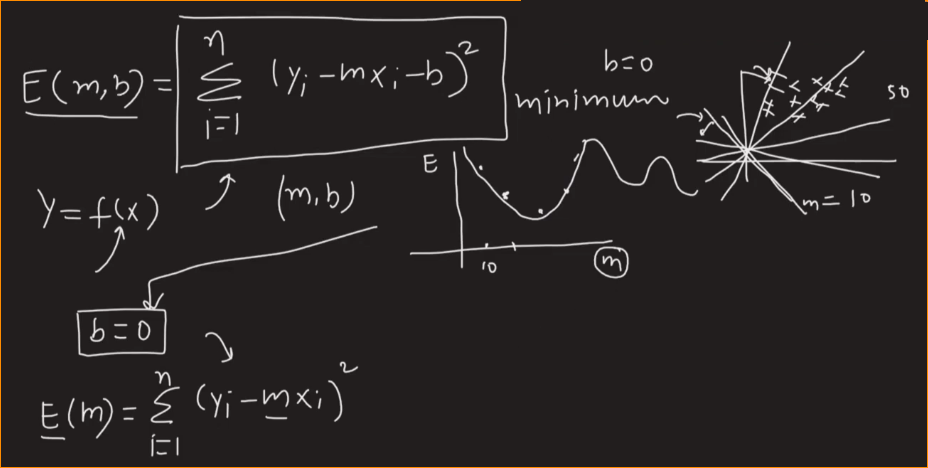

+ changing value of b & keeping m = 1

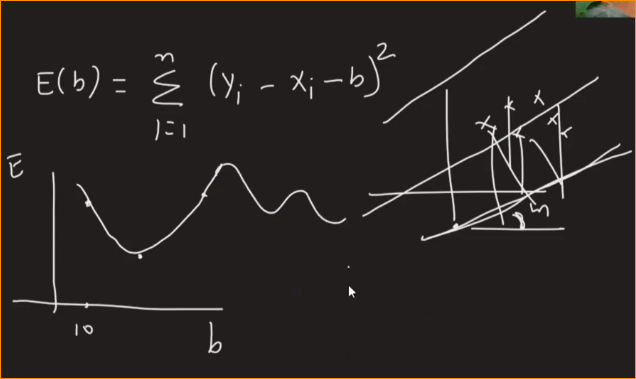

+ now changing both the values together

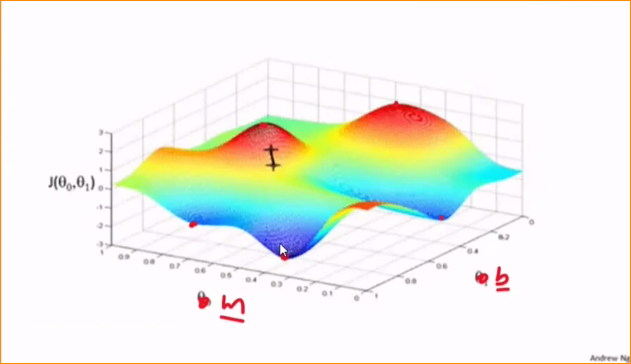

+ for some values of m & b error will be maximum & for some it will be minimum.. we need that value of m & b where error will value will be minimum

+ but how do we know what is maxima & what is minima?
by using concepts of maxima & minima in calculas

+ whenver we'll be at minima, slope will be 0

+ how to find slope? find derivative of error function & make it = 0
  so we'll find derivative of both with respect to m & b & make it = 0


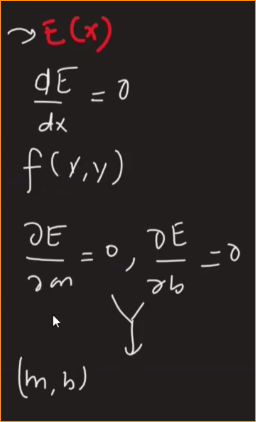

+ we'll get 2 equations of m & b, by solving them we'll get the value of m & b

+ so now we've to perform diffrentiation, make it equal to 0 & extract the values of m & b

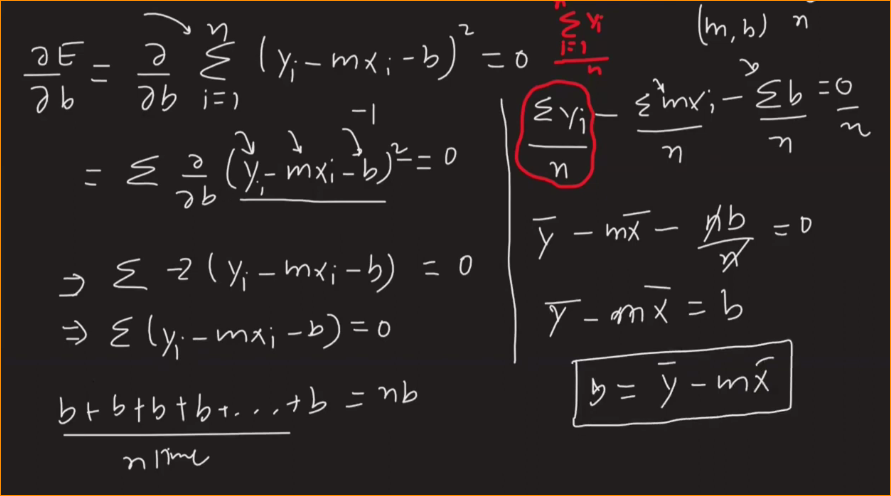

+
finding the value of m:









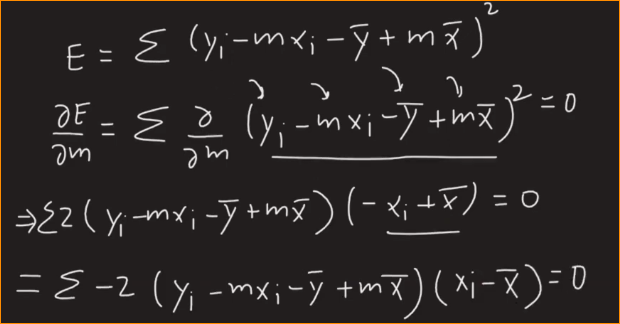
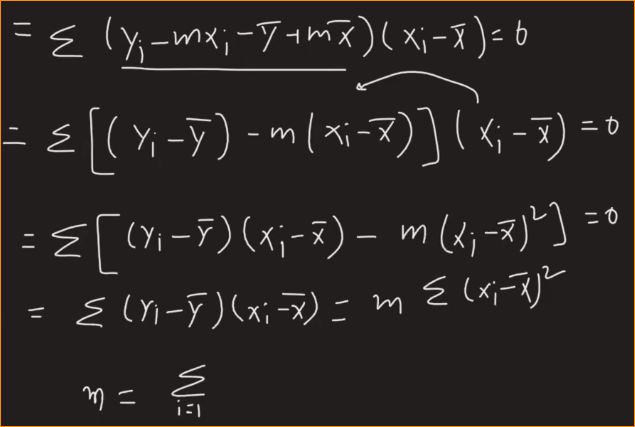
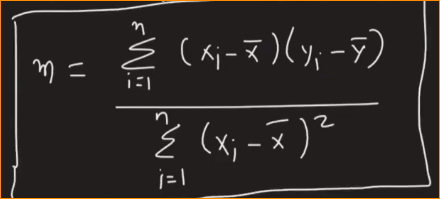

##Creating own python class for linear regression

In [ ]:
class MyLR():

  def __init__(self):
    self.m = None
    self.b = None

  def fit(self, X_train, y_train):

    num = 0
    den = 0

    for i in range(X_train.shape[0]):
      num = num + ((X_train[i] - X_train.mean()) * (y_train[i] - y_train.mean()))
      den = den + ((X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean()))

    self.m = num/den
    self.b = y_train.mean() - (self.m * X_train.mean())

    print(self.m, self.b)


  def predict(self,X_test):
    return self.m * X_test + self.b

In [ ]:
import numpy as np
import pandas as pd

df_test = pd.read_csv("/content/placement.csv")

In [ ]:
X = df.iloc[:,0].values
y = df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [ ]:
#testing my class

lr = MyLR()

In [ ]:
lr.fit(X_train, y_train)

0.5579519734250721 -0.8961119222429152


In [ ]:
X_test[0]

8.58

In [ ]:
lr.predict(X_test)

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

#Regression Metrics

+ How to know the efficiency of Algorithm?
+ How better it performed

## Types of metrics available to find model performance

1. MAE (mean absolute error)
2. MSE (mean squared error)
3. RMSE (root mean squared error)
4. R2 Score
5. Adjusted R2 score

##MAE

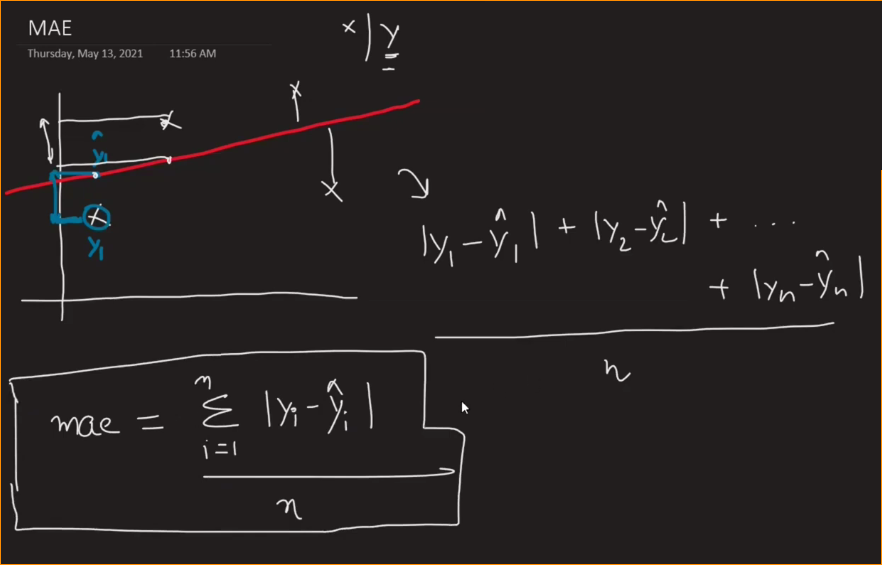

+ calcukating the difference b/w actual & predicted & taking a mean of it for all the points is MAE

+ our goal is to minimize this error

+ unit of MAE & Output is similar so it will easy to understand the loss in numbers for example in above data, Package unit is in lpa so 1.5
mae denotes a loss of 1.5lpa

+ can handle outliars

+ we use modulus when calculating the difference b/w actual & predicted, issue with that is.. its not diffrentiable so cant be optimized


##MSE

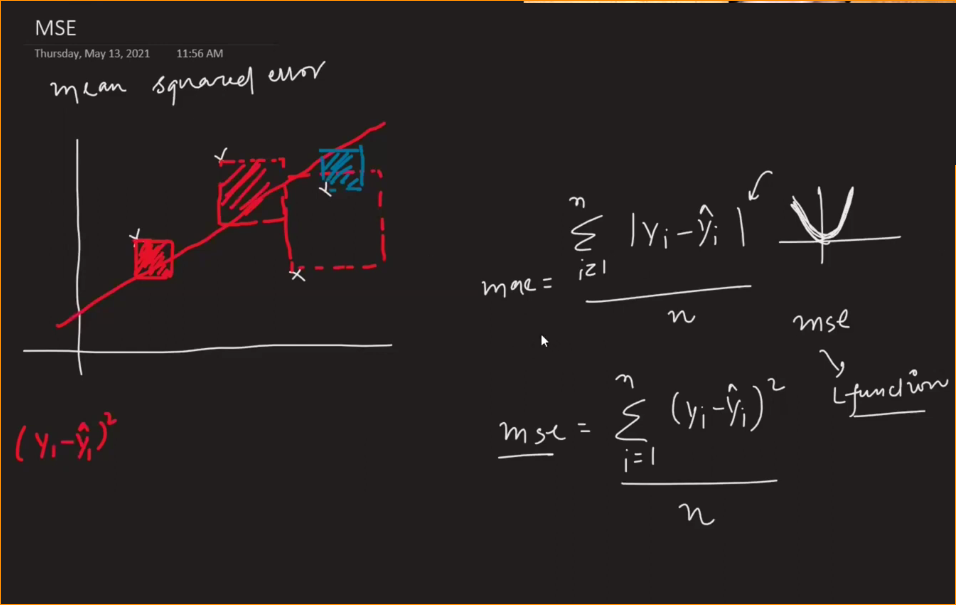

+ In mae we take modulus, but in mse we take square, thats the only difference

+ can be used as loss function bcoz its diffrentiable at all points

+ since we are taking square, its unit will also be in square to that of output which make it difficult to interpret

+ it penalizes outliars bcoz of "square", so if there are a lot of outliars then we should go with MAE otherwise with less outliars we can go with MSE

##RMSE

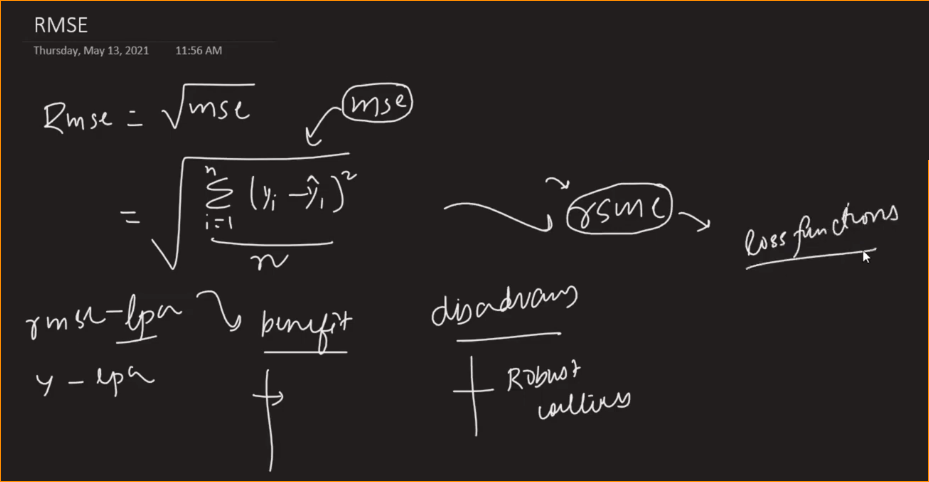

+ Its nothing but root of MSE
+ Its unit though is same as of output since we're taking a root
+ all properties remains the same as of MSE

## Above 3 are loss functions vs R2 score & Adjusted R2 score

+ above 3 depends on the context, sometime it could be more & sometime it could be less like in case of death prediction any greater then 0 will be more vs when predicting loss we can decide a threshold which could be atleast more then 0

+ whereas r2 score & adjusted r2 score are independent, It give actual performance in percentage

## R2 score

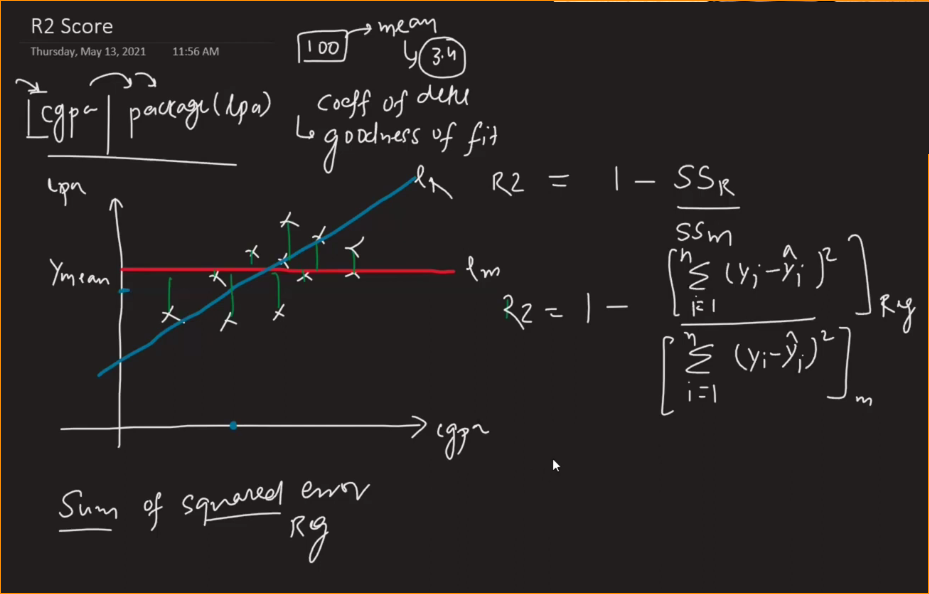

+ lets take an example of our data with cgpa & package, in worst case when somebody asks about how much my package could be? you'll calculate the mean & tell them

+ but since we have another column, cgpa, so we draw a best fit line, tell them according to cgpa

+ In r2 score, we calculate how better best fit performed in comparison to the worst case "mean" technique stated above

### Interpretation

+ when r2 score is 0, It means SSR/SSM is = 1, It will only be equal to 1 when best fit line is same as mean line meaning regression line is making same mistakes as mean line which means its not able to take any beefit of cgpa, so it means its worst performing model

+ when r2 score is 1, it means SSR/SSM is = 0, it can only be 0 when num is = 0 means best fit line is passing through every data point, its perfect line.

+ If r2 score is close to 1 (e.g., 0.95), it suggests that your model is doing an excellent job of capturing and explaining the patterns in the data, and it makes highly accurate predictions.

+ If r2 score is close to 0 (e.g., 0.05), it suggests that your model is not explaining much of the variance in the dependent variable, and its predictions are not very accurate.

+ r2 score -ve means, SSR/SSM is > 1, means num > den, means best fit line is even worst then mean line

+ r2 score is 0.8 or anything +ve means this amount of variance in output is being explained by input columns, rest cant be explained

##Adjusted R2 score

+ Problem with r2 score is as no of columns increases, r2 score also increases as they are able to explain the variance more

+ sometime r2 score also increases or stay uneffected even if data have irrelevant columns, whereas it should decrease

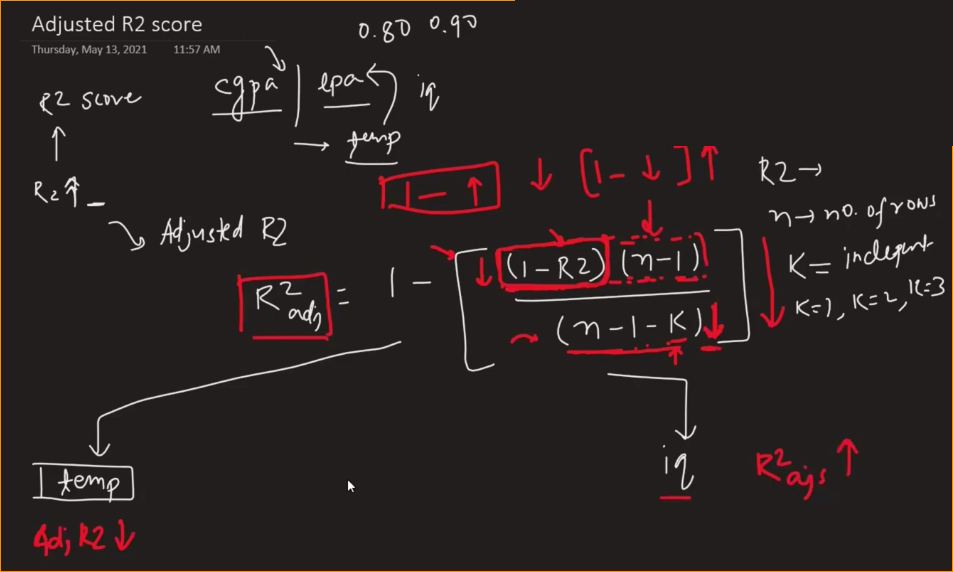

+ when we add irrelevant column like temp, denominator will decrease, in num, n-1 will stay constant & r2 score may remain constant or may decrease a little but in both cases, which means num will also decrease therby it will increase the fraction term & when substracted by 1, it will decrease

+ when we add relevant column like cgpa, denominator will decrease surely, r2 score will increase rapidaly but since substracting by 1, it will decrease faster then denominator, whole fraction term will go down, hence when substracting from 1, adjusted r2 score will increase.

##Code implimentation of all metrics

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/placement.csv")

In [ ]:
df.head()

cgpa  package
0  6.89     3.26
1  5.12     1.98
2  7.82     3.25
3  7.42     3.67
4  6.94     3.57

Text(0, 0.5, 'package')

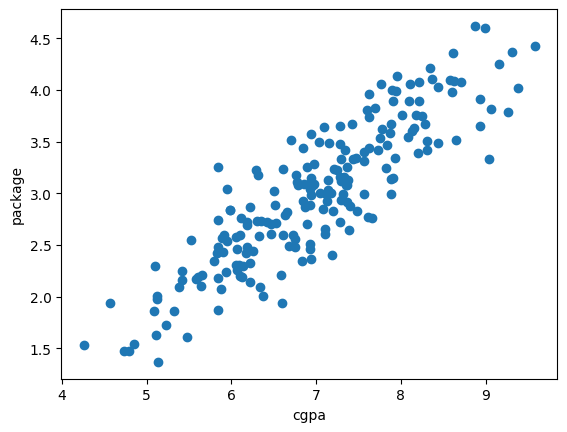

In [ ]:
#plotting a scatter plot to visualize if data is linear or not

plt.scatter(df['cgpa'], df['package'])
plt.xlabel('cgpa')
plt.ylabel('package')

In [ ]:
#since data is linear
#so we'll apply linear regression algorithm

In [ ]:
#seperating X (input) & y (output)

X = df.iloc[:, 0:1]
y = df.iloc[:, -1]

In [ ]:
#train test split
#to hide some data from model
#which can be used later to training performance

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#test size is 0.2 means 20% data for testing & 80% data for training
#random state to reproduce this result

In [ ]:
#applying algorithm
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
#train model on data
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
#testing the prediction

# lr.predict(X_test.iloc[1].values.reshape(1, 1))

lr.predict([[7.20]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.12114229])

Text(0, 0.5, 'package')

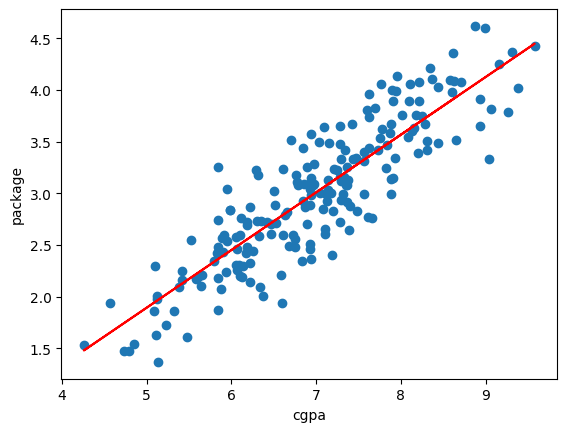

In [ ]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_train, lr.predict(X_train), color = 'red')
plt.xlabel('cgpa')
plt.ylabel('package')

### checking metrics

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [ ]:
y_actual = y_test.values
y_actual

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [ ]:
print(f"MAE:{mean_absolute_error(y_actual, y_pred)} lpa")

MAE:0.2884710931878175 lpa


In [ ]:
print(f"MSE:{mean_squared_error(y_actual, y_pred)}")

MSE:0.12129235313495527


In [ ]:
print(f"RMSE:{np.sqrt(mean_squared_error(y_actual, y_pred))} lpa")

RMSE:0.34827051717731616 lpa


In [ ]:
r2 = r2_score(y_actual, y_pred)
r2_percentage = r2 * 100

print(f"R2 Score: {r2_percentage:.2f}%")

R2 Score: 78.07%


In [ ]:
r2 = r2_score(y_actual, y_pred)
n = len(y_actual)
num_features = 1  #no of columns: k

adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - num_features - 1))
adjusted_r2_percentage = adjusted_r2 * 100

print(f"Adjusted R2 Score: {adjusted_r2_percentage:.2f}%")

Adjusted R2 Score: 77.50%


##Implimentation on real data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/Salary_Data.csv")
df.head()

YearsExperience   Age  Salary
0              1.1  21.0   39343
1              1.3  21.5   46205
2              1.5  21.7   37731
3              2.0  22.0   43525
4              2.2  22.2   39891

In [ ]:
df = df[["YearsExperience", "Salary"]]
df.head()

YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891

Text(0, 0.5, 'Salary')

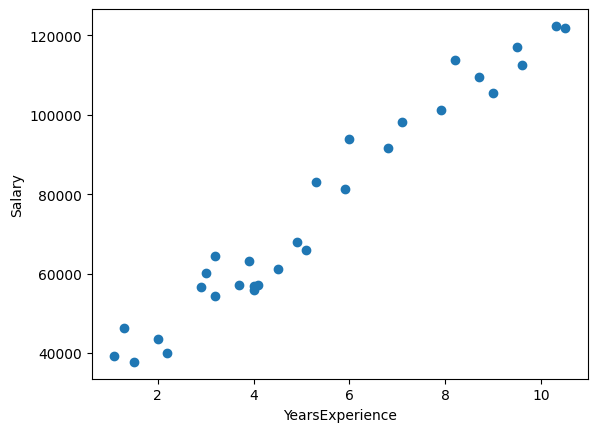

In [ ]:
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

In [ ]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr.predict([[1.3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36833.63210301])

Text(0, 0.5, 'Salary')

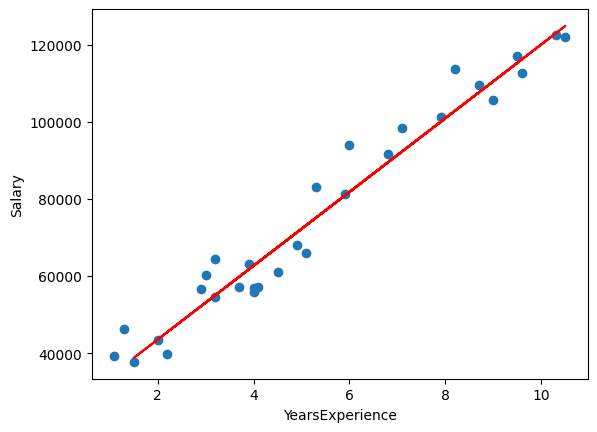

In [ ]:
plt.scatter(df['YearsExperience'], df['Salary'])
plt.plot(X_train, lr.predict(X_train), color = 'red')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([36833.63210301, 34919.71472592, 67456.3101364 , 59800.64062805,
       92337.23603852, 81810.69046455])

In [ ]:
y_actual = y_test.values
y_actual

array([46205, 39343, 61111, 57189, 98273, 93940])

In [ ]:
def calculate_metrics(y_actual, y_pred, X):
    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_actual, y_pred)

    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_actual, y_pred)

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    # R-squared (r2 score)
    r2 = r2_score(y_actual, y_pred)

    # Adjusted R-squared
    n = len(y_actual)
    p = X.shape[1]
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

    return mae, mse, rmse, r2, adjusted_r2

# Example usage:
y_actual = [3, 5, 7, 9, 11]
y_pred = [2.8, 5.2, 7.1, 9.3, 10.8]

mae, mse, rmse, r2, adjusted_r2 = calculate_metrics(y_actual, y_pred, X)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared (r2): {r2}")
print(f"Adjusted R-squared: {adjusted_r2}")

MAE: 0.2
MSE: 0.04400000000000004
RMSE: 0.2097617696340304
R-squared (r2): 0.9944999999999999
Adjusted R-squared: 0.9926666666666666


#Multiple Linear Regression

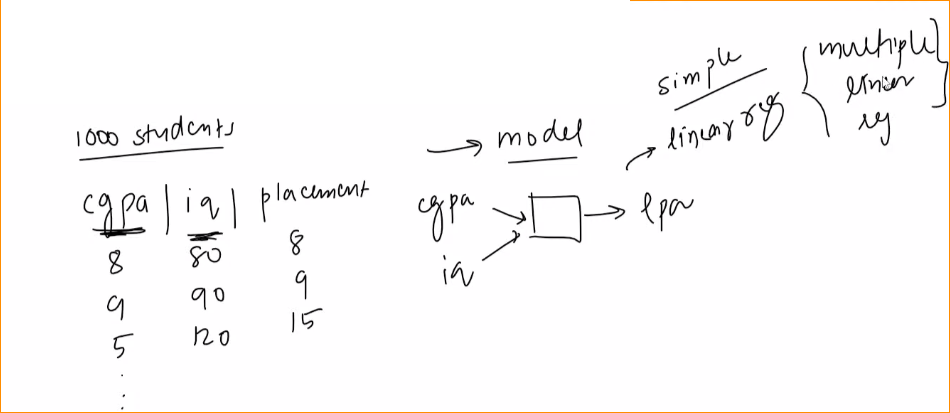

+ lets take as example of data where we have 3 columns: cgpa, iq, placement. we need to create a linear regression ml model to predict the placement when given 2 inputs- cgpa & iq.

+ since there are 2 input columns, we cant use "simple linear regression".

+ we'll use "Multiple Linear regression"

+ In SLR, we try to find best fit ilne where m & b values are least possible but since we're not working on 2d plane, in MLR, it's 3d a plane so we'll draw a plane.

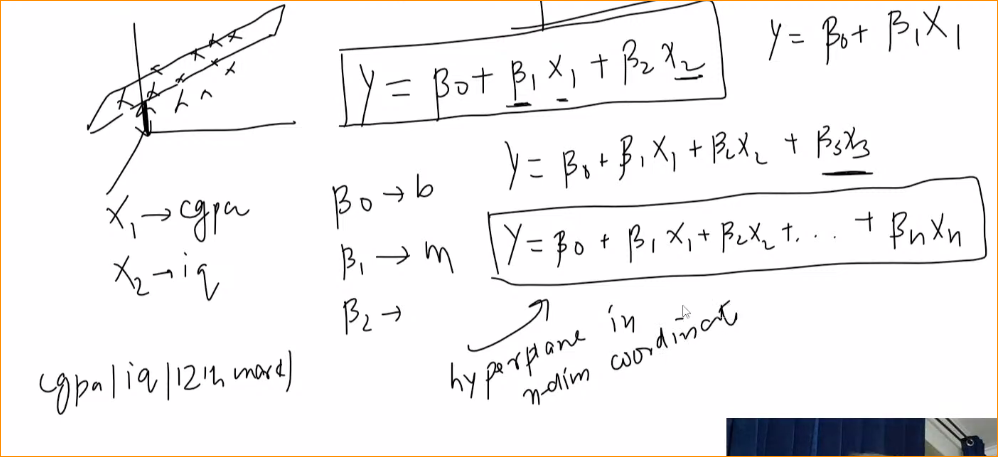

+ In MLR, we try to draw a hyperplane in n-dimensional cordinates system.

+ In SLR, we find the values of m & b but in MLR, we find the values of β0, β1, β2... βn

+ β0, β1, β2... βn are weights of those columns, how much output column rely on those columns so if β1 is high it means that output column reply on that column more

## Code Implimentation

In [ ]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
X,y = make_regression(n_samples = 100, n_features = 2, n_informative = 2, n_targets = 1, noise = 50)

In [ ]:
df = pd.DataFrame({'features1':X[:,0], 'features2':X[:,1], 'target':y})

In [ ]:
df.shape

(100, 3)

In [ ]:
df.head()

features1  features2      target
0   0.196893   0.130265   13.163732
1  -0.252355  -0.503761   -1.370067
2   0.139300  -1.551593 -133.552292
3   1.090029  -0.511487   35.025050
4   0.014002  -0.270986   -1.445619

In [ ]:
fig = px.scatter_3d(df,x='features1', y = 'features2', z = 'target')
fig.show()

In [ ]:
#data seems sort of linear
#so we apply train, test, split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state =3)

In [ ]:
#creating linear regression object
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
 y_pred = lr.predict(X_test)

In [ ]:
print(f"MAE:{mean_absolute_error(y_test, y_pred)}")
print(f"MSE:{mean_squared_error(y_test, y_pred)}")
print(f"R2:{r2_score(y_test, y_pred)}")

MAE:38.07863871158695
MSE:2155.8809602981264
R2:0.7961202563152812


In [ ]:
# Define x and y
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)

# Create a grid of points using x and y
Xgrid, yGrid = np.meshgrid(y, x)

# Create a Linear Regression model
lr = LinearRegression()

# Assuming you have training data X_train and y_train, fit the model
lr.fit(X_train, y_train)  # Replace X_train and y_train with your actual training data

# Now you can use the fitted model to make predictions
final = np.vstack((Xgrid.ravel(), yGrid.ravel())).T
z_final = lr.predict(final).reshape(10, 10)
z = z_final

In [ ]:
final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

In [ ]:
fig = px.scatter_3d(df,x='features1',y = 'features2', z= 'target')
fig.add_trace(go.Surface(x = x, y = y, z = z))
fig.show()

In [ ]:
lr.coef_

array([94.68383557, 97.17323524])

In [ ]:
lr.intercept_

-0.5123164540892784

##Mathematical Formulation

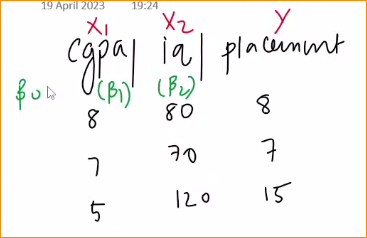

+ lets say we need to create a mlr model on above data to predict package amount with 2 inputs cgpa & iq

+ assume that we already know the values of b1, b2 & b0 so we can put it into formula:

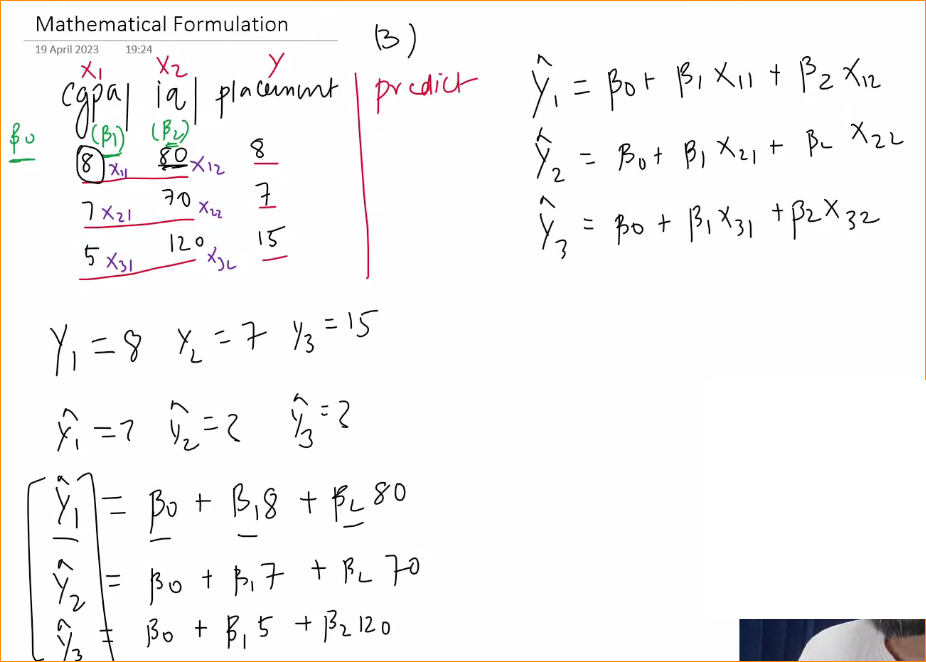

+ now lets say we dont have only 2 input columns, we have "m" columns, so formula will extend like below:

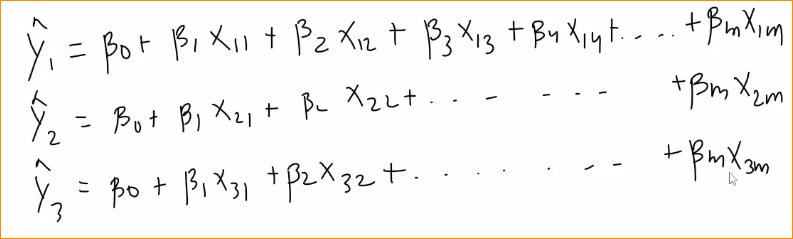

+ now lets say, we dont have only 3 students data but we have "n" students data, we can extend the formula like:

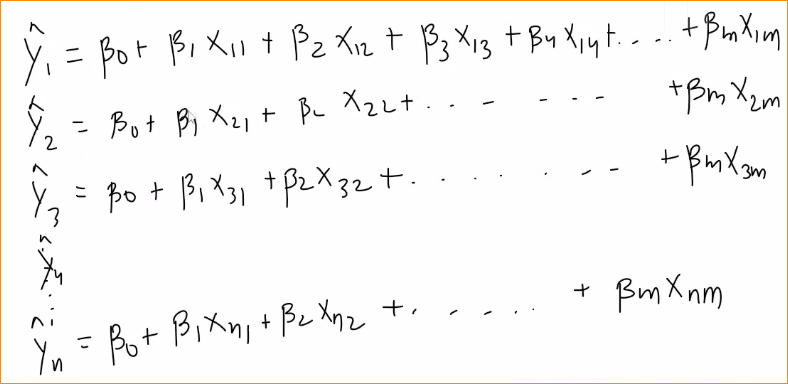

+ To simplify, we can create a metrix  "Y^" to hold all predictions

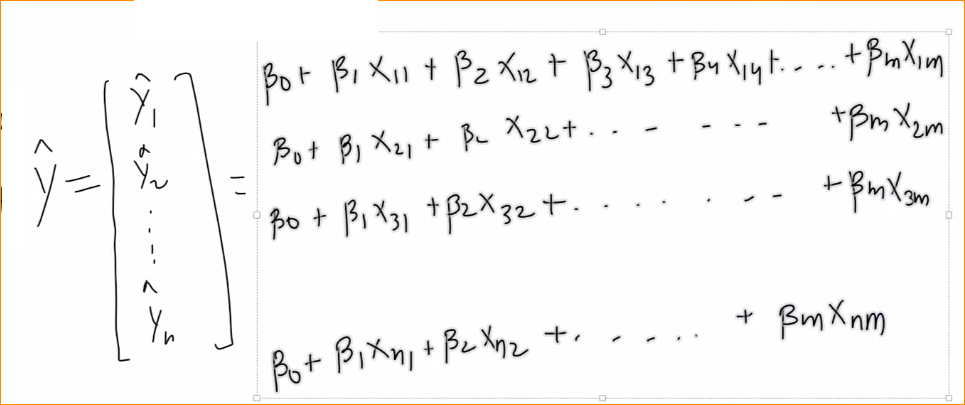

+ shape of above metrix will be n x 1 (n rows & 1 column)

+ solving above expression in terms on "matrix dot product"

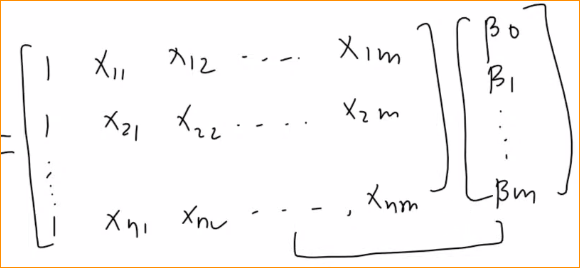

+ multiply 1st row by all items in columns, multiply 2nd row by all items in columns, multiply 3rd row by all items in columns.. & so on till n rows

+ now we can simplify it to : **Y^ = Xβ**

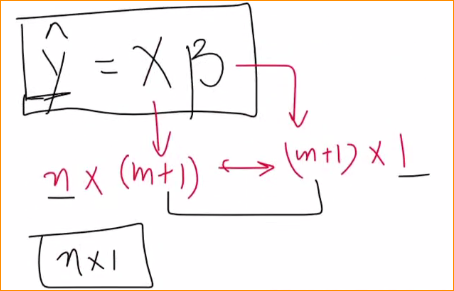

+ This equation is true for any number of dimensions.. 1, 100, 10000.. !

+ how it becomes "m + 1"? b1 till bm.. m & there is b0 also so m + 1

+ loss function remains the same as it was in SLR, we will try to minimize the distance b/w hyper plane & co-ordinates


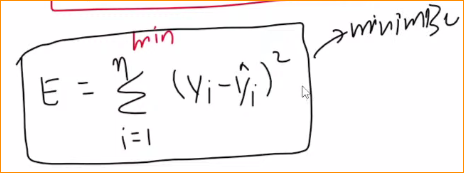

+ we need to use above equation in "matrix form" bcoz earlier in SLR we were dealing with scaler values but since now in MLR we are dealing with metrices so we need to convert it into matrices form


+ now creating Y & Yi^ matrix and since both have same dimension it can be substracted:

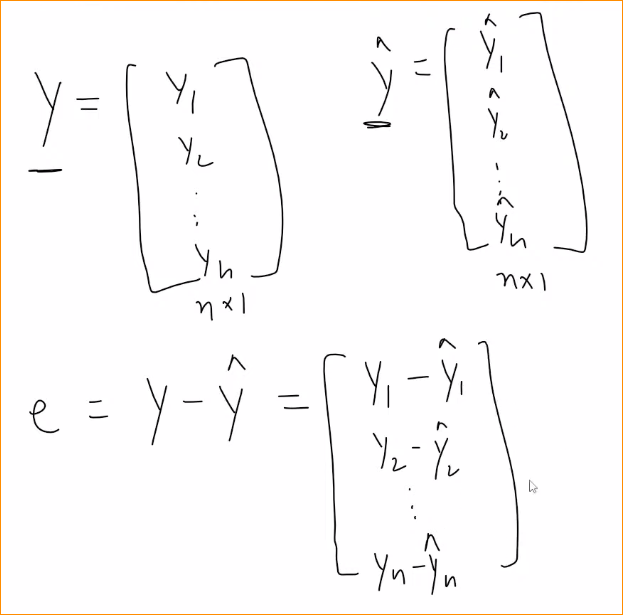

+ now transposing e & multiplying it with e:

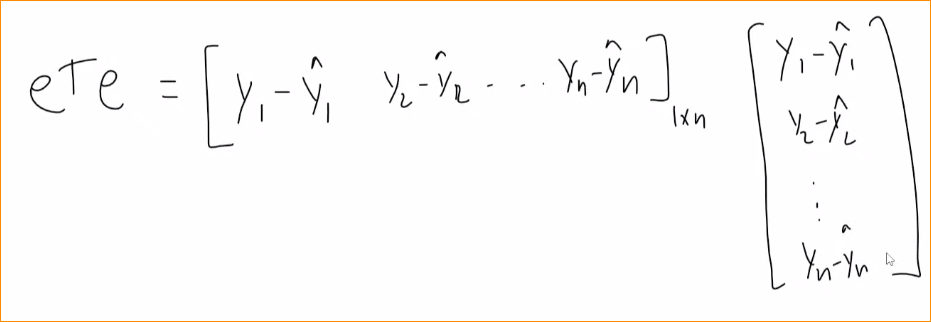


+ when we multiple 1xn & nx1 then we'll get a scalor value 1x1

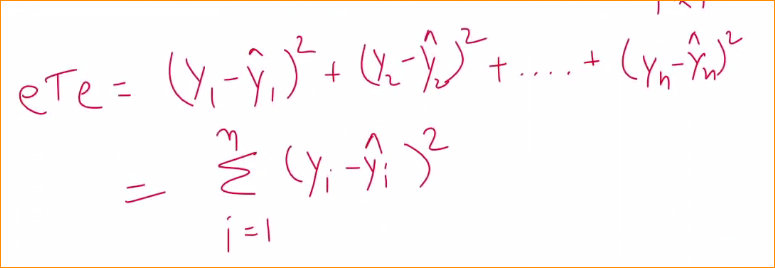

+ which is a loss function, so we got to know that in MLRof any dimension, loss function is E = eTe. Our goal is to minimize this equation.

+ we need a hyperplane which will minimize this equation, now if re-write i:

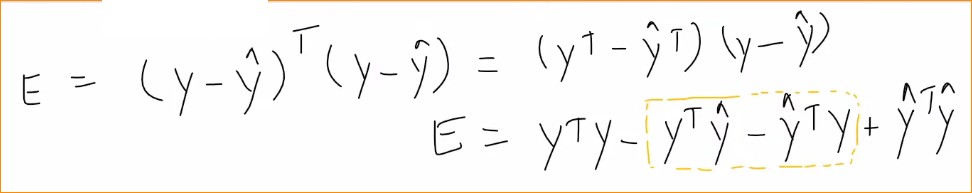

+ YtY^ & Y^tY are actually similar matrix so it can be re-written as:

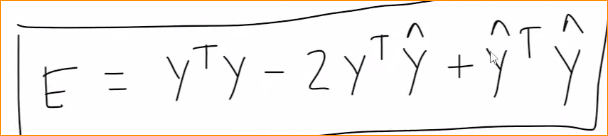

+ replacing Y^ with XBeta

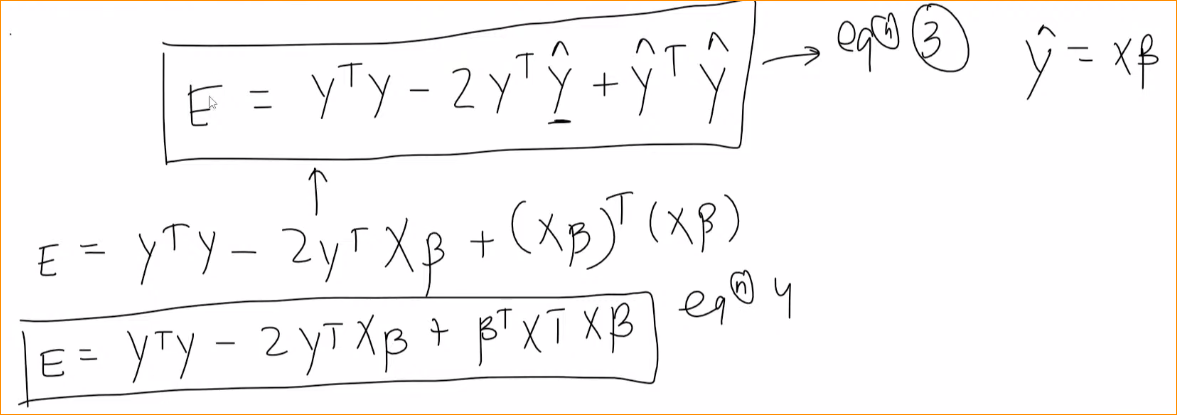

+ This is a error function, Its a function of "Beta", just like y = f(x) which means if we change the value of x then f(x) will change & it will change the value of y, same goes here, If we change the value of of beta in this equation then error function will change bcoz X & Y are output & input columns so they are fixed, only beta will change, then what will be the change? how to calculate the change in beta?

+ answer is: Using above error function equation.

+ we have to find such value of beta matrix for which E is minimum.

+ relationship b/w E & beta in linear regression is like below curve:

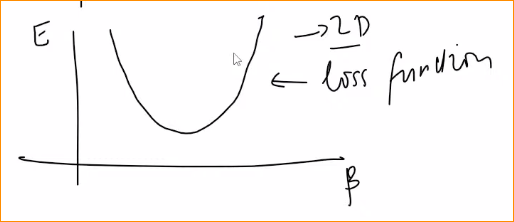

+ we want to arrive at the minimum point, which means where slope = 0

+ means we need to diffrentiate loss function with respect to beta & make it equal to 0 : dE/dB = 0

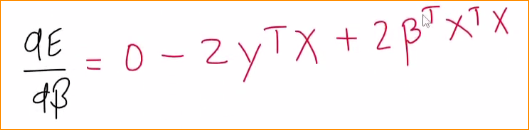

+ now we need to make this equal to 0 & extract beta value

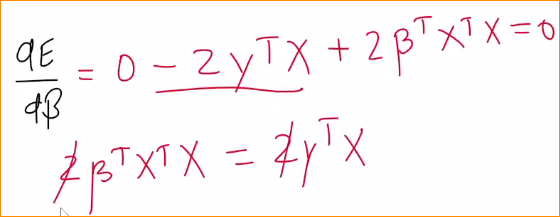


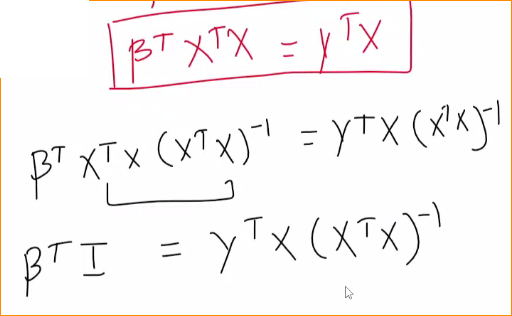


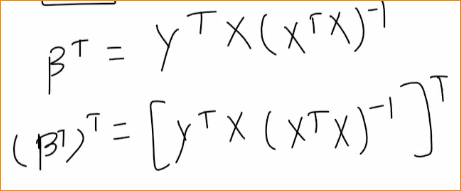


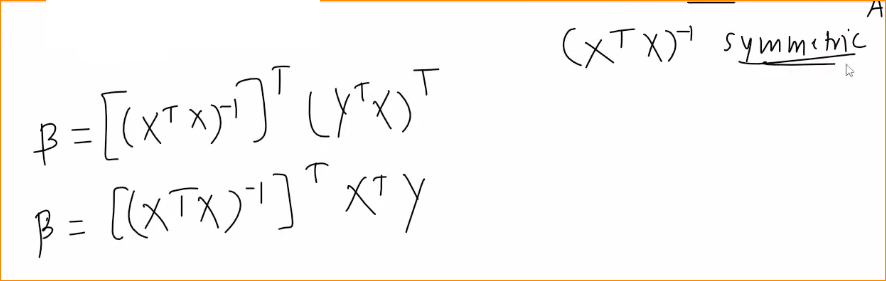

+ we have to prove (XtX)-1 is symmetric

+ [(XtX)-1]t = (XtX)-1

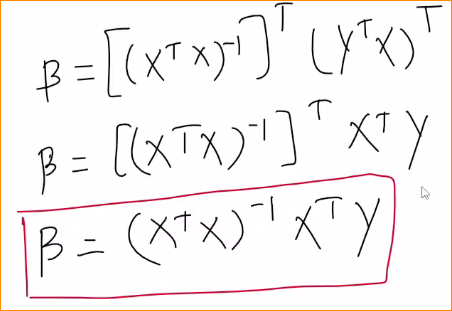




##Try to derive "Beta" value by copy-pen so your gaps of understanding will fill.

##Code MLR class from scratch

In [ ]:
import numpy as np
from sklearn.datasets import load_diabetes

In [ ]:
X,y = load_diabetes(return_X_y=True)

In [ ]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [ ]:
X.shape

(442, 10)

In [ ]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [ ]:
y.shape

(442,)

##Need to apply MLR using sklearn library

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(353, 10)
(89, 10)


In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [ ]:
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test)
y_pred

array([154.1213881 , 204.81835118, 124.93755353, 106.08950893,
       258.5348576 , 256.3310074 , 118.75087616, 119.52440696,
       101.50816735, 190.54048661, 141.70656811, 172.51883961,
       174.33861649, 134.80942706, 294.13994537,  94.11798038,
       211.97059795, 156.49579378, 134.21000428, 119.62664644,
       148.87842251, 165.00873409, 151.10021038, 176.04063756,
       133.27769647, 221.29555392, 197.17324941,  96.1577688 ,
        50.26012711, 230.48580317, 242.06073866, 114.11129218,
        67.07532417,  94.52943825, 201.21415375, 167.05136201,
       159.881268  , 192.78746659, 114.49551325, 233.48234551,
       140.82563045, 121.0680409 , 192.27480772, 191.12738845,
       179.16865788, 148.34935601, 163.47414622, 276.81647884,
       100.17926432, 164.10555298, 255.80762189, 136.9466204 ,
       152.37503699, 107.92237882, 194.21924678,  77.34670792,
       118.50482479,  68.38335763, 154.29258529, 162.48840259,
       168.36788326, 156.87790322,  97.14191797, 238.16

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, y_pred)

0.4399338661568968

In [ ]:
reg.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [ ]:
reg.intercept_

151.88331005254167

##Making own MLR algorithm class from scratch

In [ ]:
class MLR():

  def __init__(self):
    self.coeff_ = None
    self.intercept_ = None

  def fit(self,X_train,y_train):
    #inserting a new column of 1
    X_train = np.insert(X_train,0,1,axis=1)

    #calculate coefs
    betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
    self.intercept_ = betas[0]
    self.coeff_ = betas[1:]

  def predict(self,X_test):
    y_pred = np.dot(X_test,self.coeff_) + self.intercept_
    return y_pred

In [ ]:
lr = MLR()

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
X_train.shape

(353, 10)

In [ ]:
np.insert(X_train,0,1,axis = 1).shape

(353, 11)

In [ ]:
X_test

array([[ 0.06713621, -0.04464164,  0.00349435,  0.03564379,  0.0493413 ,
         0.03125356,  0.07072993, -0.03949338, -0.00061174,  0.01963284],
       [-0.07816532,  0.05068012,  0.07786339,  0.05285804,  0.07823631,
         0.0644473 ,  0.02655027, -0.00259226,  0.04067283, -0.00936191],
       [ 0.04170844,  0.05068012, -0.01482845, -0.01713512, -0.00569682,
         0.00839372, -0.01394774, -0.00185424, -0.01189685,  0.00306441],
       [-0.04547248, -0.04464164, -0.04824063, -0.01944183, -0.00019301,
        -0.01603186,  0.06704829, -0.03949338, -0.02479543,  0.01963284],
       [ 0.0090156 ,  0.05068012,  0.06924089,  0.05974375,  0.01769438,
        -0.02323427, -0.04708248,  0.03430886,  0.10329702,  0.07348023],
       [ 0.03444337,  0.05068012,  0.12528712,  0.02875809, -0.05385517,
        -0.01290037, -0.10230705,  0.1081111 ,  0.00027248,  0.02791705],
       [-0.03457486, -0.04464164, -0.05901875,  0.00121528, -0.05385517,
        -0.07803525,  0.06704829, -0.0763945 

In [ ]:
lr.predict(X_test)

array([154.1213881 , 204.81835118, 124.93755353, 106.08950893,
       258.5348576 , 256.3310074 , 118.75087616, 119.52440696,
       101.50816735, 190.54048661, 141.70656811, 172.51883961,
       174.33861649, 134.80942706, 294.13994537,  94.11798038,
       211.97059795, 156.49579378, 134.21000428, 119.62664644,
       148.87842251, 165.00873409, 151.10021038, 176.04063756,
       133.27769647, 221.29555392, 197.17324941,  96.1577688 ,
        50.26012711, 230.48580317, 242.06073866, 114.11129218,
        67.07532417,  94.52943825, 201.21415375, 167.05136201,
       159.881268  , 192.78746659, 114.49551325, 233.48234551,
       140.82563045, 121.0680409 , 192.27480772, 191.12738845,
       179.16865788, 148.34935601, 163.47414622, 276.81647884,
       100.17926432, 164.10555298, 255.80762189, 136.9466204 ,
       152.37503699, 107.92237882, 194.21924678,  77.34670792,
       118.50482479,  68.38335763, 154.29258529, 162.48840259,
       168.36788326, 156.87790322,  97.14191797, 238.16

In [ ]:
r2_score(y_test,y_pred)

0.4399338661568968

In [ ]:
lr.coeff_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [ ]:
lr.intercept_

151.88331005254165

#Problem with OLS method which is implimented in scikit learn

+ There are 2 methods to apply LinearRegression

  1. OLS (closed form solution means we get a formula to calculate)
  2. GradientDescent (non closed form solution, no formula, we slowly move towards correct solution, we dont get the correct solution rather close to correct solution)

+ why OLS when GradientDescent is available or vice versa?
  becoz at 1 point, we have to calculate the inverse of the metrix & solving inverse computationaly expensive, time complexity is n3

  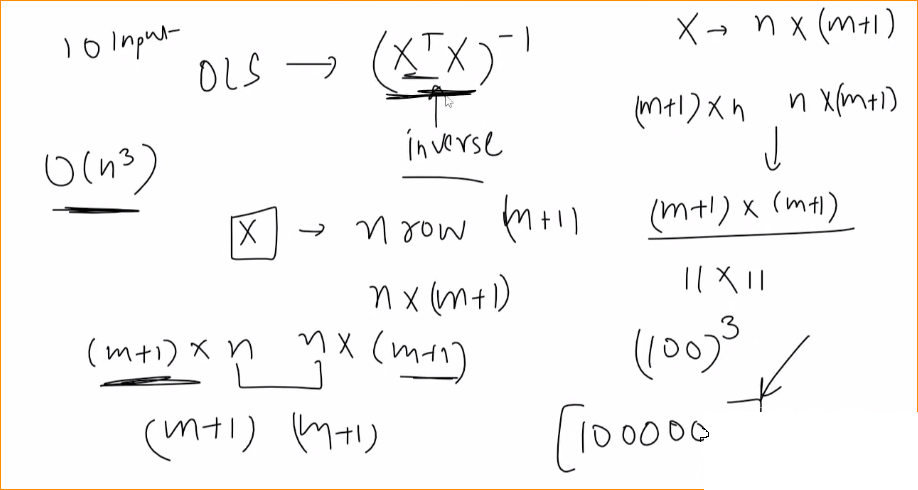

  + So if you have higher dimension data then "Gradient Descent" is a better option for faster computation



#Car Price Predicter - Linear Regression Project

In [149]:
import pandas as pd

In [150]:
df = pd.read_csv("/content/quikr_car.csv")

In [151]:
df.head()

name   company  year          Price  \
0    Hyundai Santro Xing XO eRLX Euro III   Hyundai  2007         80,000   
1                 Mahindra Jeep CL550 MDI  Mahindra  2006       4,25,000   
2              Maruti Suzuki Alto 800 Vxi    Maruti  2018  Ask For Price   
3  Hyundai Grand i10 Magna 1.2 Kappa VTVT   Hyundai  2014       3,25,000   
4        Ford EcoSport Titanium 1.5L TDCi      Ford  2014       5,75,000   

   kms_driven fuel_type  
0  45,000 kms    Petrol  
1      40 kms    Diesel  
2  22,000 kms    Petrol  
3  28,000 kms    Petrol  
4  36,000 kms    Diesel

In [152]:
df.shape

(892, 6)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


##data cleaning

In [154]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

###Quality

+ year has many non-year values
+ yr object to int
+ price column has non-price values
+ price column to float
+ kms driven: remove "kms"
+ kms driven: object to int
+ kms driven has nan values
+ fuel type has nan values
+ keep 1st 3 items in name
+ company cols contains irrelevant data


In [155]:
#create a backup copy
backup = df.copy()

In [156]:
df['year']

0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
887    zest
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 892, dtype: object

In [157]:
#keeping all the numeric values in yr col
#it will remove other values
#and chnging dtype to int

df = df[df['year'].str.isnumeric()]
df['year'] = df['year'].astype(int)
df

<ipython-input-157-03ee7c39f5e4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].astype(int)


name    company  year          Price  \
0      Hyundai Santro Xing XO eRLX Euro III    Hyundai  2007         80,000   
1                   Mahindra Jeep CL550 MDI   Mahindra  2006       4,25,000   
2                Maruti Suzuki Alto 800 Vxi     Maruti  2018  Ask For Price   
3    Hyundai Grand i10 Magna 1.2 Kappa VTVT    Hyundai  2014       3,25,000   
4          Ford EcoSport Titanium 1.5L TDCi       Ford  2014       5,75,000   
..                                      ...        ...   ...            ...   
886                    Toyota Corolla Altis     Toyota  2009       3,00,000   
888                     Tata Zest XM Diesel       Tata  2018       2,60,000   
889                      Mahindra Quanto C8   Mahindra  2013       3,90,000   
890                Honda Amaze 1.2 E i VTEC      Honda  2014       1,80,000   
891               Chevrolet Sail 1.2 LT ABS  Chevrolet  2014       1,60,000   

       kms_driven fuel_type  
0      45,000 kms    Petrol  
1          40 kms    Diesel  
2      22,000 kms    Petrol  
3      28,000 kms    Petrol  
4      36,000 kms    Diesel  
..            ...       ...  
886  1,32,000 kms    Petrol  
888    27,000 kms    Diesel  
889    40,000 kms    Diesel  
890        Petrol       NaN  
891        Petrol       NaN  

[842 rows x 6 columns]

In [158]:
df.shape

(842, 6)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int64 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int64(1), object(5)
memory usage: 46.0+ KB


In [160]:
df = df[df['Price'] != "Ask For Price"]

In [161]:
df['Price'] = df['Price'].str.replace(",","").astype(int)

<ipython-input-161-627d4f23a3aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].str.replace(",","").astype(int)


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int64 
 3   Price       819 non-null    int64 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int64(2), object(4)
memory usage: 44.8+ KB


In [163]:
df['kms_driven'] = df['kms_driven'].str.replace(" kms","").str.replace(",","")

<ipython-input-163-04445239e711>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kms_driven'] = df['kms_driven'].str.replace(" kms","").str.replace(",","")


In [164]:
df = df[df['kms_driven'] != "Petrol"]

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int64 
 3   Price       817 non-null    int64 
 4   kms_driven  817 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int64(2), object(4)
memory usage: 44.7+ KB


In [166]:
df['kms_driven'] = df['kms_driven'].astype(int)

<ipython-input-166-fe661a0c7a7b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kms_driven'] = df['kms_driven'].astype(int)


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int64 
 3   Price       817 non-null    int64 
 4   kms_driven  817 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.7+ KB


In [168]:
df = df[~df['fuel_type'].isna()]

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.6+ KB


In [170]:
df['name'] = df['name'].str.split(" ").str.slice(0,3).str.join(' ')

In [171]:
df

name   company  year   Price  kms_driven fuel_type
0       Hyundai Santro Xing   Hyundai  2007   80000       45000    Petrol
1       Mahindra Jeep CL550  Mahindra  2006  425000          40    Diesel
3         Hyundai Grand i10   Hyundai  2014  325000       28000    Petrol
4    Ford EcoSport Titanium      Ford  2014  575000       36000    Diesel
6                 Ford Figo      Ford  2012  175000       41000    Diesel
..                      ...       ...   ...     ...         ...       ...
883      Maruti Suzuki Ritz    Maruti  2011  270000       50000    Petrol
885          Tata Indica V2      Tata  2009  110000       30000    Diesel
886    Toyota Corolla Altis    Toyota  2009  300000      132000    Petrol
888            Tata Zest XM      Tata  2018  260000       27000    Diesel
889      Mahindra Quanto C8  Mahindra  2013  390000       40000    Diesel

[816 rows x 6 columns]

In [172]:
df.reset_index(drop=True, inplace=True)

In [173]:
df

name   company  year   Price  kms_driven fuel_type
0       Hyundai Santro Xing   Hyundai  2007   80000       45000    Petrol
1       Mahindra Jeep CL550  Mahindra  2006  425000          40    Diesel
2         Hyundai Grand i10   Hyundai  2014  325000       28000    Petrol
3    Ford EcoSport Titanium      Ford  2014  575000       36000    Diesel
4                 Ford Figo      Ford  2012  175000       41000    Diesel
..                      ...       ...   ...     ...         ...       ...
811      Maruti Suzuki Ritz    Maruti  2011  270000       50000    Petrol
812          Tata Indica V2      Tata  2009  110000       30000    Diesel
813    Toyota Corolla Altis    Toyota  2009  300000      132000    Petrol
814            Tata Zest XM      Tata  2018  260000       27000    Diesel
815      Mahindra Quanto C8  Mahindra  2013  390000       40000    Diesel

[816 rows x 6 columns]

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.4+ KB


In [175]:
df.describe()

year         Price     kms_driven
count   816.000000  8.160000e+02     816.000000
mean   2012.444853  4.117176e+05   46275.531863
std       4.002992  4.751844e+05   34297.428044
min    1995.000000  3.000000e+04       0.000000
25%    2010.000000  1.750000e+05   27000.000000
50%    2013.000000  2.999990e+05   41000.000000
75%    2015.000000  4.912500e+05   56818.500000
max    2019.000000  8.500003e+06  400000.000000

In [176]:
#less then 75% of car prices are under 5 lakhs
#bt there are cars upto 85 lakhs also

df[df['Price'] > 6000000]

name   company  year    Price  kms_driven fuel_type
534  Mahindra XUV500 W6  Mahindra  2014  8500003       45000    Diesel

In [177]:
#this seems to be an outliar, so we'll remove it

df = df[df['Price'] < 6000000]
df

name   company  year   Price  kms_driven fuel_type
0       Hyundai Santro Xing   Hyundai  2007   80000       45000    Petrol
1       Mahindra Jeep CL550  Mahindra  2006  425000          40    Diesel
2         Hyundai Grand i10   Hyundai  2014  325000       28000    Petrol
3    Ford EcoSport Titanium      Ford  2014  575000       36000    Diesel
4                 Ford Figo      Ford  2012  175000       41000    Diesel
..                      ...       ...   ...     ...         ...       ...
811      Maruti Suzuki Ritz    Maruti  2011  270000       50000    Petrol
812          Tata Indica V2      Tata  2009  110000       30000    Diesel
813    Toyota Corolla Altis    Toyota  2009  300000      132000    Petrol
814            Tata Zest XM      Tata  2018  260000       27000    Diesel
815      Mahindra Quanto C8  Mahindra  2013  390000       40000    Diesel

[815 rows x 6 columns]

In [178]:
df.reset_index(drop=True, inplace=True)

In [179]:
df.describe()

year         Price     kms_driven
count   815.000000  8.150000e+02     815.000000
mean   2012.442945  4.017933e+05   46277.096933
std       4.005079  3.815888e+05   34318.459638
min    1995.000000  3.000000e+04       0.000000
25%    2010.000000  1.750000e+05   27000.000000
50%    2013.000000  2.999990e+05   41000.000000
75%    2015.000000  4.900000e+05   56879.000000
max    2019.000000  3.100000e+06  400000.000000

In [180]:
df.shape

(815, 6)

In [181]:
#out of 892, we are left with 815 rows
#its cleaned now

In [182]:
#save this cleaned data into a csv file
df.to_csv("cleaned_car.csv")

##model building

In [183]:
# we have to make a price predictor which can predit price of a car based on the inputs

In [184]:
X = df.drop(columns='Price')
X

name   company  year  kms_driven fuel_type
0       Hyundai Santro Xing   Hyundai  2007       45000    Petrol
1       Mahindra Jeep CL550  Mahindra  2006          40    Diesel
2         Hyundai Grand i10   Hyundai  2014       28000    Petrol
3    Ford EcoSport Titanium      Ford  2014       36000    Diesel
4                 Ford Figo      Ford  2012       41000    Diesel
..                      ...       ...   ...         ...       ...
810      Maruti Suzuki Ritz    Maruti  2011       50000    Petrol
811          Tata Indica V2      Tata  2009       30000    Diesel
812    Toyota Corolla Altis    Toyota  2009      132000    Petrol
813            Tata Zest XM      Tata  2018       27000    Diesel
814      Mahindra Quanto C8  Mahindra  2013       40000    Diesel

[815 rows x 5 columns]

In [185]:
y = df['Price']
y

0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
810    270000
811    110000
812    300000
813    260000
814    390000
Name: Price, Length: 815, dtype: int64

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [187]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

In [188]:
ohe = OneHotEncoder()

In [189]:
#encoding all categorical cols

ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [190]:
ohe.categories_

[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
        'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
        'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
        'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
        'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
        'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
        'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
        'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
        'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
        'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
        'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
        'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
        'Ford EcoSport Titanium', 'Ford EcoSport Trend',
        'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
        '

In [191]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [192]:
#rather then doing encoding & then performing transofmrations
#we can do both in 1 pipeline which can be passed directly to model

In [193]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_), ['name','company','fuel_type']), remainder = 'passthrough')

In [194]:
#passing all categories to ohe bcoz some categories might not be available in training data & test data
#& at the time of prediction it will throw error

In [195]:
lr = LinearRegression()

In [196]:
pipe = make_pipeline(column_trans, lr)

In [197]:
#now we can directly send X_train & y_train for training
#bcoz in pipeline, it will first go through column transformation which is OHE
#we can have different types of column transformations also rather then just 1
#then that transformed data will be passed to linear regression object

pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [200]:
#we can directly pass raw data bcoz inside pipeline it goes through
#all pre-set transofmrations & then that transformed data is passed
#ml model & we can directly call predict function to get the predictedv value

y_pred = pipe.predict(X_test)
y_pred

array([ 439848.54700776,  177170.55891998,  427528.5182559 ,
        494393.25099879, 1752366.79245287,  484738.39581791,
        -19671.45161069,  361737.01635052,  599345.74289644,
        715097.5334224 , 1486762.14540608,  713495.70944054,
       1211323.2894005 ,  500798.99065991,  598939.99005366,
        414267.50773595,  177661.26941846,  639409.37917243,
        482834.78275107,  254415.35366252,   -9782.53674033,
        184025.07545038,  241249.28713484,  178050.54494912,
         70786.13457081, -261657.575356  ,  251081.79398558,
        195147.06181575,   38996.48129325,  130479.94622573,
        237684.03042781,  428119.99391631, 2210610.60358034,
        261974.19706228,  477782.2503188 ,  446447.91492548,
        330935.77513704,  302290.18738483,  190544.7720077 ,
        170001.32976292,  514648.56183643, 1126769.48235935,
       2210610.60358034,  476179.13316973,  608528.5508991 ,
        210780.98356899,  790729.08555228,  358734.54856637,
       1209532.45018879,

In [201]:
r2_score(y_test, y_pred)

0.6207794249081153

In [203]:
for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
  lr = LinearRegression()
  pipe = make_pipeline(column_trans, lr)
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)
  print(r2_score(y_test, y_pred))

0.7549563045317034
0.5877730481330372
0.7588787842341027
0.6549909425809468
0.7167304126427655
0.5934094776868128
0.7747072512182366
0.6021803829701812
0.6146222237876056
0.6278472814808298


In [204]:
#since there is a lot of variation in accuracy score when ran in loop so we use random_state

In [209]:
results = []

for i in range(1000):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = i)
  lr = LinearRegression()
  pipe = make_pipeline(column_trans, lr)
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)

  r2 = r2_score(y_test, y_pred)
  results.append({'i': i, 'r2_score': r2})

In [214]:
results_df = pd.DataFrame(results)

In [218]:
max_r2_row = results_df.loc[results_df['r2_score'].idxmax()]

In [219]:
print(max_r2_row)

i           433.000000
r2_score      0.845652
Name: 433, dtype: float64


In [220]:
#so for 433 random_state value r2_score is highest & its 84%

In [224]:
#lets train the model with that random state which is giving highest score

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = int(max_r2_row['i']))
lr = LinearRegression()
pipe = make_pipeline(column_trans, lr)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(r2_score(y_test, y_pred))

0.8456515104452564


In [242]:
#now we can make pickle of this model
#which can be used to build  an api

In [243]:
import pickle

with open('car_price_predictor.pkl', 'wb') as model_file:
    pickle.dump(pipe, model_file)

In [244]:
with open('car_price_predictor.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [245]:
prediction_test = loaded_model.predict(pd.DataFrame([['Hyundai i10 Sportz', 'Hyundai',2014, 88000, 'Petrol']],
                                  columns = ['name','company','year','kms_driven', 'fuel_type']))

In [246]:
print(f"₹{prediction_test[0]:,.2f}")

₹289,107.25
